In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


def save_nonzero(X_path="./raw-to-epoch/X.npy", Y_path="./raw-to-epoch/Y.npy", suffix='nonzero'):
    X=np.load(X_path).squeeze()
    Y=np.load(Y_path)
    l = len(X) // 3
    
    X_x, X_y, X_z = X[l*0:l*1], X[l*1:l*2], X[l*2:l*3]
    Y_x, Y_y, Y_z = Y[l*0:l*1], Y[l*1:l*2], Y[l*2:l*3]
    nonzero_idx = ((Y_x != 0) | (Y_y != 0) | (Y_z != 0)).squeeze()
    print(f'{nonzero_idx.sum()} non zero values found.')

    X_x, X_y, X_z = X_x[nonzero_idx], X_y[nonzero_idx], X_z[nonzero_idx]
    Y_x, Y_y, Y_z = Y_x[nonzero_idx], Y_y[nonzero_idx], Y_z[nonzero_idx]

    X_cleaned = np.hstack([X_x.ravel()[..., None], X_y.ravel()[..., None], X_z.ravel()[..., None]])
    Y_cleaned = np.hstack([Y_x.ravel()[..., None], Y_y.ravel()[..., None], Y_z.ravel()[..., None]])
    
    np.save(f'./X_{suffix}.npy', X_cleaned)
    np.save(f'./Y_{suffix}.npy', Y_cleaned)
    print(f'Saved ./X_{suffix}.npy and ./Y_{suffix}.npy succesfully')
    

def save_xyz(X_path="./raw-to-epoch/X.npy", Y_path="./raw-to-epoch/Y.npy", suffix='3'):
    X=np.load(X_path).squeeze()
    Y=np.load(Y_path)
    
    X = np.dstack([X[:int(len(X) / 3)][..., None], X[int(len(X) / 3):2*int(len(X) / 3)][..., None], X[2*int(len(X) / 3):][..., None]])
    Y = np.dstack([Y[:int(len(Y) / 3)][..., None], Y[int(len(Y) / 3):2*int(len(Y) / 3)][..., None], Y[2*int(len(Y) / 3):][..., None]])
    
    # Pad by additional two zero rows, to make it divisible by 7 (no. of days)
    X = np.vstack([X, np.zeros((2, 30, 3))])
    Y = np.vstack([Y, np.zeros((2, 3))])
    
    np.save(f'X_{suffix}.npy', X)
    np.save(f'Y_{suffix}.npy', Y)
    print(f'Saved ./X_{suffix}.npy and ./Y_{suffix}.npy succesfully')


def save_daywise(X_3_path='./X_3.npy', Y_3_path='./Y_3.npy', suffix='daywise'):
    X = np.load(X_3_path)
    Y = np.load(Y_3_path)
    t = 86400
    
    x_days = np.empty((7, t, 30, 3))
    x_days[0] = X[t*0:t*1]
    x_days[1] = X[t*1:t*2]
    x_days[2] = X[t*2:t*3]
    x_days[3] = X[t*3:t*4]
    x_days[4] = X[t*4:t*5]
    x_days[5] = X[t*5:t*6]
    x_days[6] = X[t*6:t*7]
    
    y_days = np.empty((7, t, 3))
    y_days[0] = Y[t*0:t*1]
    y_days[1] = Y[t*1:t*2]
    y_days[2] = Y[t*2:t*3]
    y_days[3] = Y[t*3:t*4]
    y_days[4] = Y[t*4:t*5]
    y_days[5] = Y[t*5:t*6]
    y_days[6] = Y[t*6:t*7]
    
    np.save(f'X_{suffix}.npy', x_days)
    np.save(f'Y_{suffix}.npy', y_days)
    print(f'Saved ./X_{suffix}.npy and ./Y_{suffix}.npy succesfully')

In [6]:
save_nonzero()
save_xyz()
save_daywise()

<IPython.core.display.Javascript object>


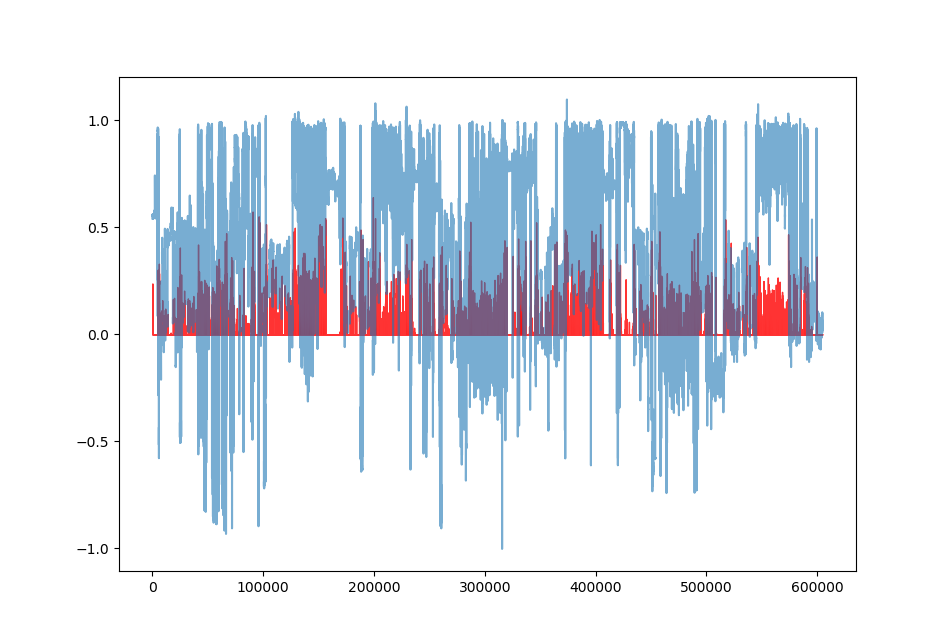

In [125]:
plt.plot(
    np.arange(len(X)//3),
    X[:len(X) // 3].mean(axis=1),
    alpha=0.6
)
plt.fill_between(
    np.arange(len(X)//3),
    Y[:len(X) // 3].squeeze() / Y.max(),
    alpha=0.8,
    color='red'
)